# Search Based

最小换乘（BFS）
When:
    1.处理问题规模较小问题
How good: 
    1.易抽象
    2.决策过程清晰，路径明确，容易纠错
How bad:
    1.对于较大规模决策问题，路径规模过大，不易存储

BEIJING, CHANGCHUN, URUMCHI, WUHAN, GUNAGHZOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK = """
BEIJING CHANGCHUN URUMCHI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK
""".split()

In [242]:
connection = {
    CHANGCHUN: [BEIJING],
    URUMCHI: [BEIJING], 
    BEIJING: [URUMCHI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN],
    WUHAN: [SHANGHAI, BEIJING, GUNAGHZOU],
    GUNAGHZOU: [WUHAN, BANGKOK],
    SHENZHEN: [WUHAN, BANGKOK],
    BANGKOK: [SHENZHEN, GUNAGHZOU]
}

In [243]:
import networkx as nx

In [244]:
%matplotlib inline

In [245]:
graph = connection

In [246]:
g = nx.Graph(graph)

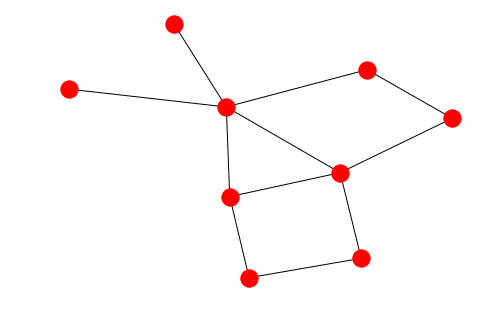

In [247]:
nx.draw(g)

In [248]:
def navigator(start, destination, connection_graph):
    pathes = [[start]]
    seen = set()
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        #print ('I am standing at :{}'.format(froniter))
        
        if froniter in seen:continue #去除已访问点
            
        successors = connection_graph[froniter]
        for s in successors:
            #print('\t---I am look forward: {}'.format(s))
            if s == destination:
                path.append(s)
                return path
            else:
                pathes.append(path + [s])
            
            pathes = sorted(pathes, key=len) #最小换乘（约束条件，BFS）
                #print(pathes[-1])
        #pathes += successors
        
        seen.add(froniter)

In [249]:
navigator(URUMCHI,BANGKOK,connection)

['URUMCHI', 'BEIJING', 'SHENZHEN', 'BANGKOK']

In [250]:
def draw_route(routes):
    print ('✈️->'.join(routes))

In [251]:
draw_route(navigator(URUMCHI,BANGKOK,connection))

URUMCHI✈️->BEIJING✈️->SHENZHEN✈️->BANGKOK


DFS&BFS

In [252]:
connection_2 = {
    0: [1, 5], 
    1: [0, 2], 
    2: [1, 3], 
    3: [2, 4], 
    4: [3],
    5: [0, 6], 
    6: [5, 7],
    7: [6]
}

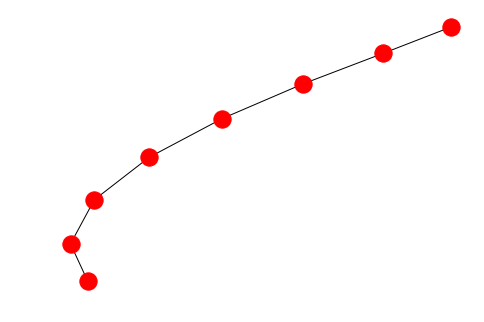

In [253]:
nx.draw(nx.Graph(connection_2))

In [254]:
def nagivator_bfs(start, destination, connection_graph):
    pathes = [start]
    seen = set()
    
    while pathes:
        froniter = pathes.pop(0)
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = pathes + successors #父节点优先遍历
                
        seen.add(froniter)

In [255]:
def nagivator_dfs(start, destination, connection_graph):
    pathes = [start ]
    seen = set()
    
    while pathes:
        froniter = pathes.pop(0)
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = successors + pathes #子节点优先遍历
                
        seen.add(froniter)

In [256]:
nagivator_dfs(0, 7, connection_2)

standing on 0 Looking forward [1, 5]
standing on 1 Looking forward [0, 2]
standing on 2 Looking forward [1, 3]
standing on 3 Looking forward [2, 4]
standing on 4 Looking forward [3]
standing on 5 Looking forward [0, 6]
standing on 6 Looking forward [5, 7]
standing on 7 Looking forward [6]


In [ ]:
nagivator_bfs(0, 7, connection_2)

# Rule Based
Sentence Generation(BNF)

In [492]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [493]:
decimal_grammar = """
expression = operator op operator
operator = num op num
num = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | num num
op = + | - | * | /
"""

In [494]:
import random

In [495]:
def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    for line in grammar_str.split('\n'): 
        line = line.strip()
        if not line: continue #空行跳过
        
        target, rules = line.split(sep)
        
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    
    return grammar

In [496]:
parse_grammar(grammar,'=>')

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [497]:
def gene(grammar_parsed, target='sentence'):
    if target not in grammar_parsed: return target #递归结束条件：target不是规则
    
    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed, target=r) for r in rule if r!='null')

In [498]:
gene(parse_grammar(grammar,'=>'))

'这个蓝色的小猫看着这个蓝色的女人'

In [499]:
gene(parse_grammar(decimal_grammar,'='), 'expression')

'1+4*3/7'

In [491]:
parse_grammar(decimal_grammar,'=')

{'expression': [['operator', 'op', 'operator']],
 'operator': [['num', 'op', 'num']],
 'num': [['0'],
  ['1'],
  ['2'],
  ['3'],
  ['4'],
  ['5'],
  ['6'],
  ['7'],
  ['8'],
  ['9'],
  ['num', 'num']],
 'op': [['+'], ['-'], ['*'], ['/']]}